In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json


In [69]:
# Loading the CSV file (Sales Data)
csv = pd.read_csv("./DMV1/sales_data_sample.csv", encoding="cp1252")

# Loading the Excel file (Sales Data)
ed = pd.read_excel("./DMV1/Sample-Sales-Data.xlsx")

# Loading the JSON file (Customers Data)
with open("./DMV1/customers.json", "r") as json_file:
    json_data = json.load(json_file)


In [70]:
# Inspecting the first few rows of the CSV data
print("CSV Data:")
csv.head()


CSV Data:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [71]:
# Inspecting the first few rows of the Excel data
print("Excel Data:")
ed.head()

Excel Data:


,Postcode,Sales_Rep_ID,Sales_Rep_Name,Year,Value
0,2121,456,Jane,2011,84219.497311
1,2092,789,Ashish,2012,28322.192268
2,2128,456,Jane,2013,81878.997241
3,2073,123,John,2011,44491.142121
4,2134,789,Ashish,2012,71837.720959


In [72]:
# Inspecting the JSON data structure (first two records)
print("JSON Data (first 2 entries):")
json_data[:2]

JSON Data (first 2 entries):


[{'id': 1,
  'email': 'isidro_von@hotmail.com',
  'first': 'Torrey',
  'last': 'Veum',
  'company': 'Hilll, Mayert and Wolf',
  'created_at': '2014-12-25T04:06:27.981Z',
  'country': 'Switzerland'},
 {'id': 2,
  'email': 'frederique19@gmail.com',
  'first': 'Micah',
  'last': 'Sanford',
  'company': 'Stokes-Reichel',
  'created_at': '2014-07-03T16:08:17.044Z',
  'country': "Democratic People's Republic of Korea"}]

In [73]:
# Checking the CSV data info
print("CSV Info:")
csv.info()


CSV Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null  

In [74]:
# Checking the Excel data info
print("Excel Info:")
ed.info()

Excel Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Postcode        390 non-null    int64  
 1   Sales_Rep_ID    390 non-null    int64  
 2   Sales_Rep_Name  390 non-null    object 
 3   Year            390 non-null    int64  
 4   Value           390 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.4+ KB


In [75]:
# Checking for missing values in CSV data
print("Missing Values in CSV Data:")
csv.isnull().sum()

Missing Values in CSV Data:


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [76]:
# Filling missing values for CSV data
csv['ADDRESSLINE2'].fillna('', inplace=True)  # Filling empty address lines
csv['STATE'].fillna('Unknown', inplace=True)  # Assuming 'Unknown' for missing states
csv['POSTALCODE'].fillna('00000', inplace=True)  # Placeholder for missing postal codes
csv['TERRITORY'].fillna('Unknown', inplace=True)  # Filling missing territory data


/tmp/ipykernel_17211/3237400963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  csv['ADDRESSLINE2'].fillna('', inplace=True)  # Filling empty address lines
/tmp/ipykernel_17211/3237400963.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [77]:
# Remove any leading/trailing spaces in the ORDERDATE column
csv['ORDERDATE'] = csv['ORDERDATE'].str.strip()

# If there is time info like ' 0:00' in the string, we can remove it
csv['ORDERDATE'] = csv['ORDERDATE'].str.split(' ').str[0]  # Keeps only the date portion

# Convert ORDERDATE to datetime format (with error handling)
csv['ORDERDATE'] = pd.to_datetime(csv['ORDERDATE'], format='%m/%d/%Y', errors='coerce')

# Check the conversion result
print(csv['ORDERDATE'].head())


0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: ORDERDATE, dtype: datetime64[ns]


In [79]:
# Select only numeric columns
csv_numeric = csv.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation = csv_numeric.corr()

# Print the correlation matrix
print(correlation)


                 ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER         1.000000         0.065543  -0.002935        -0.055550   
QUANTITYORDERED     0.065543         1.000000   0.005564        -0.018397   
PRICEEACH          -0.002935         0.005564   1.000000        -0.020965   
ORDERLINENUMBER    -0.055550        -0.018397  -0.020965         1.000000   
SALES               0.039919         0.551426   0.657841        -0.058400   
QTR_ID             -0.051383        -0.035323   0.008712         0.040716   
MONTH_ID           -0.039723        -0.039048   0.005152         0.034016   
YEAR_ID             0.904596         0.069535  -0.005938        -0.057367   
MSRP               -0.010280         0.017881   0.670625        -0.021067   

                    SALES    QTR_ID  MONTH_ID   YEAR_ID      MSRP  
ORDERNUMBER      0.039919 -0.051383 -0.039723  0.904596 -0.010280  
QUANTITYORDERED  0.551426 -0.035323 -0.039048  0.069535  0.017881  
PRICEEACH        0.657841

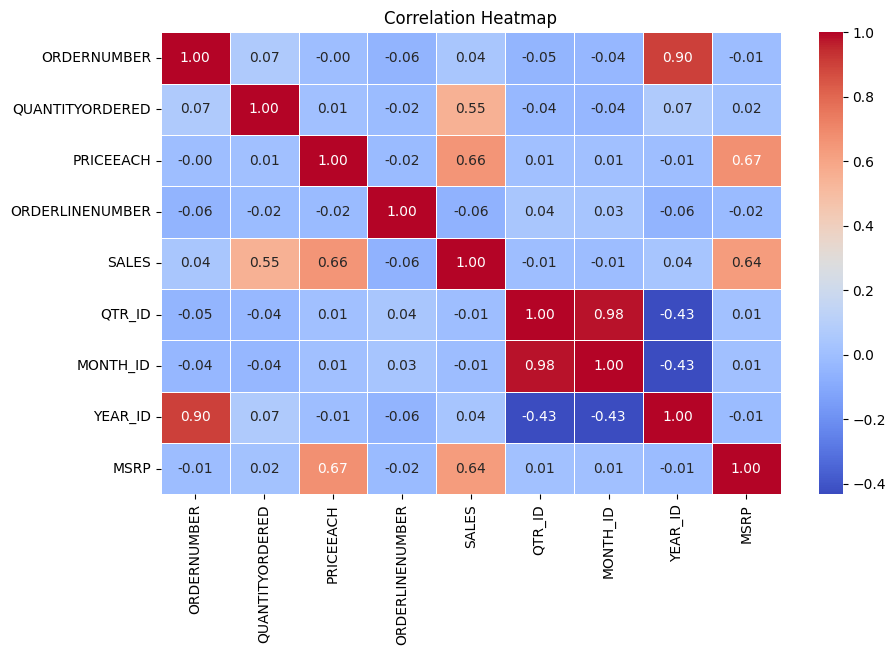

In [80]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


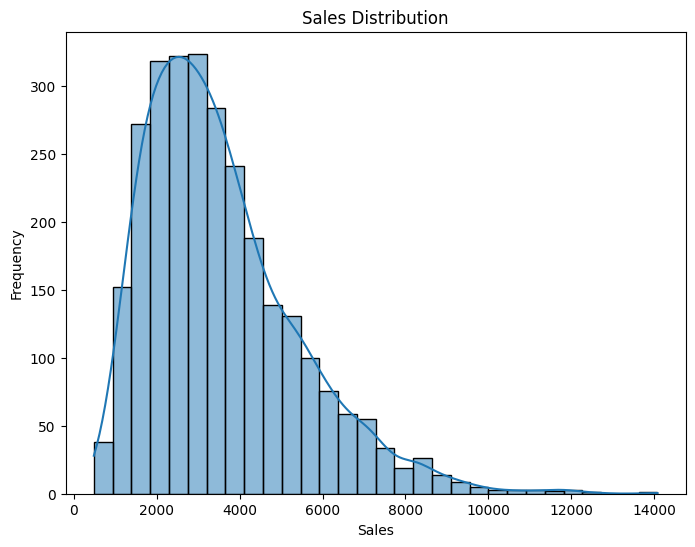

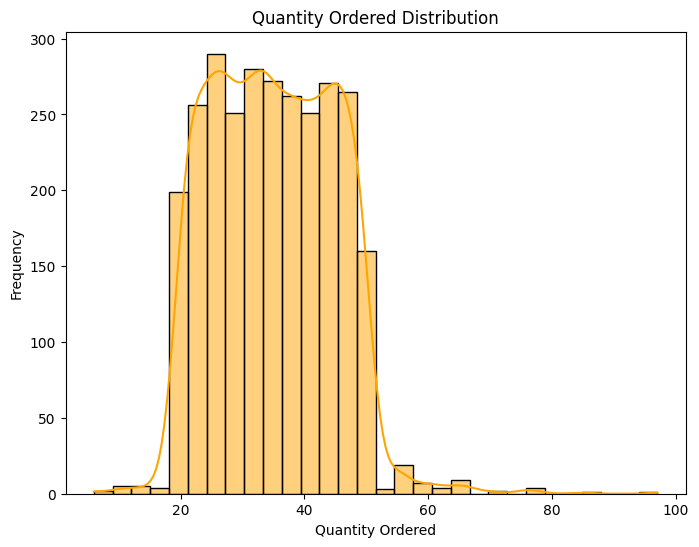

In [28]:
# Distribution of Sales
plt.figure(figsize=(8, 6))
sns.histplot(csv['SALES'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()



In [ ]:

# Distribution of Quantity Ordered
plt.figure(figsize=(8, 6))
sns.histplot(csv['QUANTITYORDERED'], bins=30, kde=True, color='orange')
plt.title('Quantity Ordered Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Encoding categorical columns using label encoding
csv['STATUS'] = csv['STATUS'].map({'Shipped': 1, 'Resolved': 2, 'On Hold': 3, 'Cancelled': 4})

# Dropping irrelevant columns
csv = csv.drop(columns=['ORDERNUMBER', 'ORDERLINENUMBER', 'ADDRESSLINE1', 'ADDRESSLINE2', 'PHONE', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME'])

# Checking the first few rows after preprocessing
print("Preprocessed Data:")
print(csv.head())


Preprocessed Data:
   QUANTITYORDERED  PRICEEACH    SALES        ORDERDATE  STATUS  QTR_ID  \
0               30      95.70  2871.00   2/24/2003 0:00     1.0       1   
1               34      81.35  2765.90    5/7/2003 0:00     1.0       2   
2               41      94.74  3884.34    7/1/2003 0:00     1.0       3   
3               45      83.26  3746.70   8/25/2003 0:00     1.0       3   
4               49     100.00  5205.27  10/10/2003 0:00     1.0       4   

   MONTH_ID  YEAR_ID  
0         2     2003  
1         5     2003  
2         7     2003  
3         8     2003  
4        10     2003  
